In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')

In [21]:
df = sns.load_dataset('penguins')

In [24]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [23]:
df.dropna(inplace=True)

Построение гистограмм

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>,
        <Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>, <Axes: >]], dtype=object)

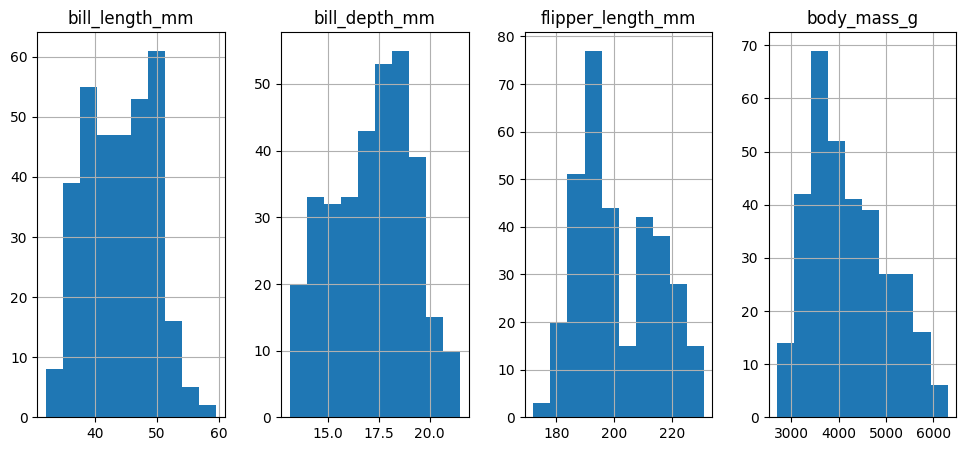

In [28]:
df.drop(["species", "island", "sex"], axis=1).hist(figsize=(15, 5), layout=(-1, 5))

Ящик с усами разбитый по группам, пример

<Axes: title={'center': 'body_mass_g'}, xlabel='species'>

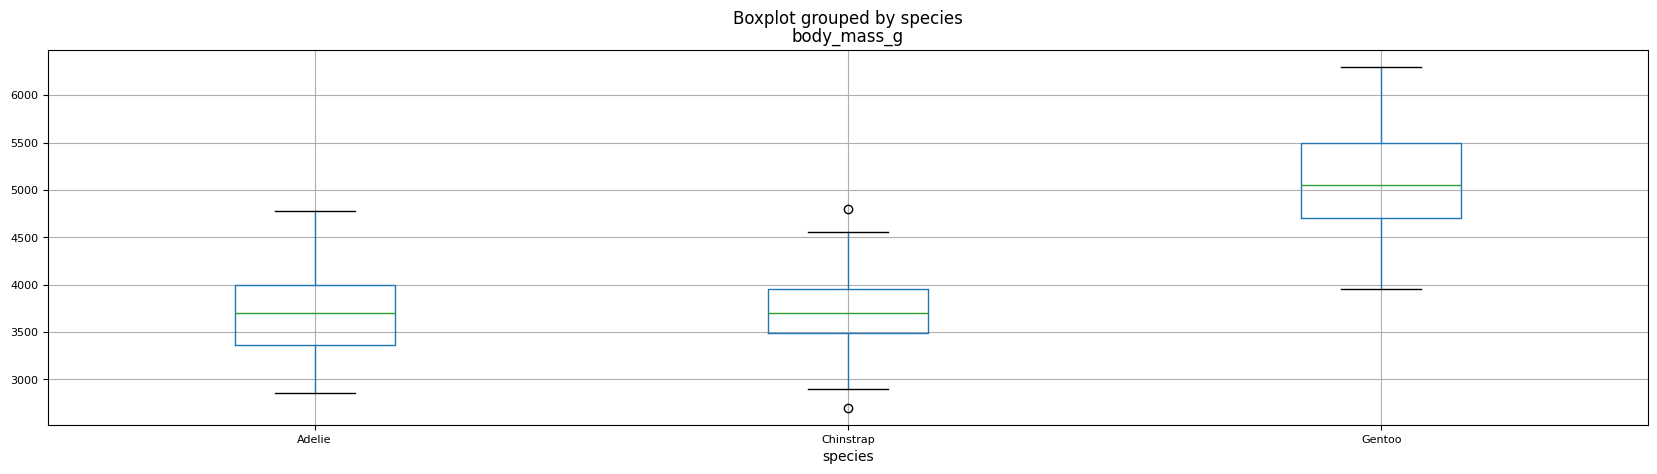

In [29]:
df.boxplot(
    column=["body_mass_g"], by="species", fontsize=8, figsize=(20, 5)
)

просто все колонки

<Axes: >

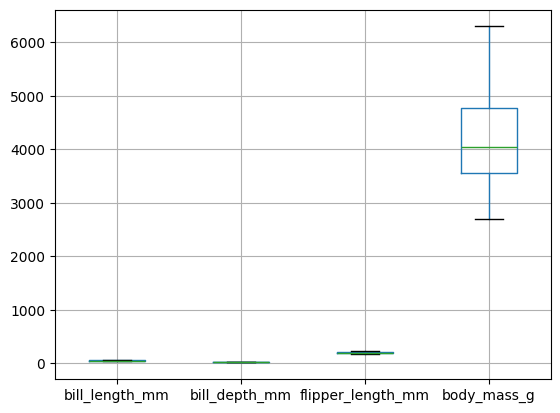

In [30]:
df.boxplot()

Корреляции

In [31]:
df.drop(["species", "island", "sex"], axis=1).corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [32]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Теперь про seaborn

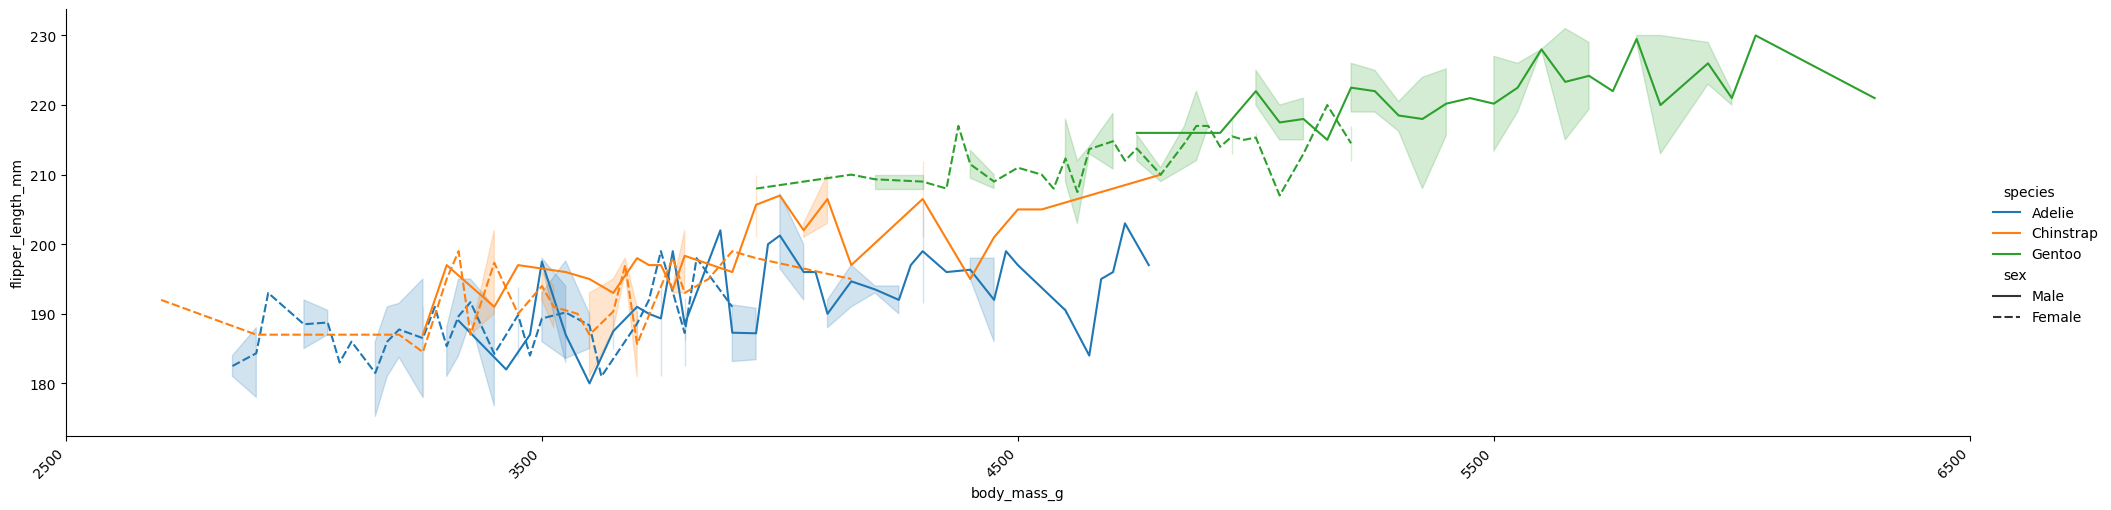

In [36]:
g = sns.relplot(
    data=df,
    x="body_mass_g",
    y="flipper_length_mm",
    hue="species",
    kind="line",  # или scatter
    style="sex",
    aspect=4,
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

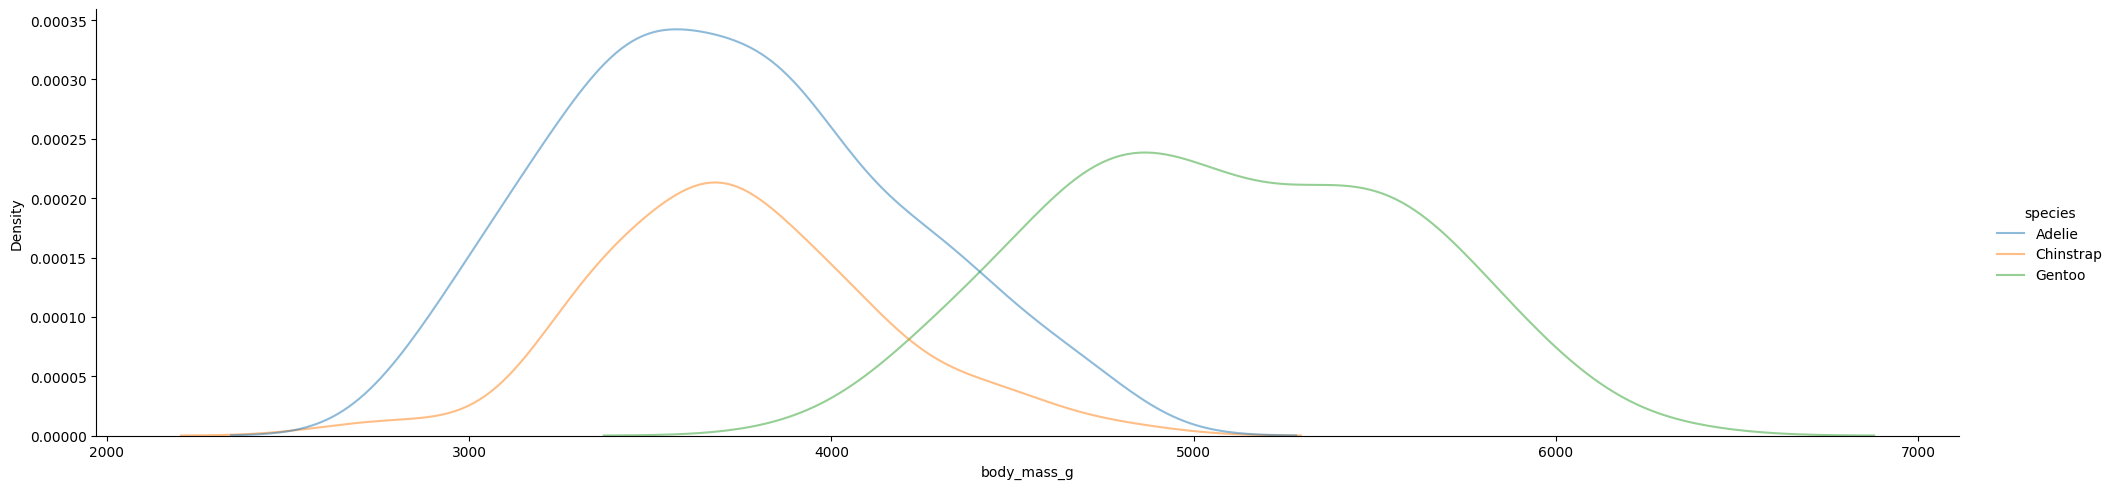

In [38]:
g = sns.displot(
    data=df,
    
    x="body_mass_g",
    
    hue="species",
    legend=True,
    aspect=4,
    kind="kde",  # kde
    alpha=0.5,
)

Это что-то тупое

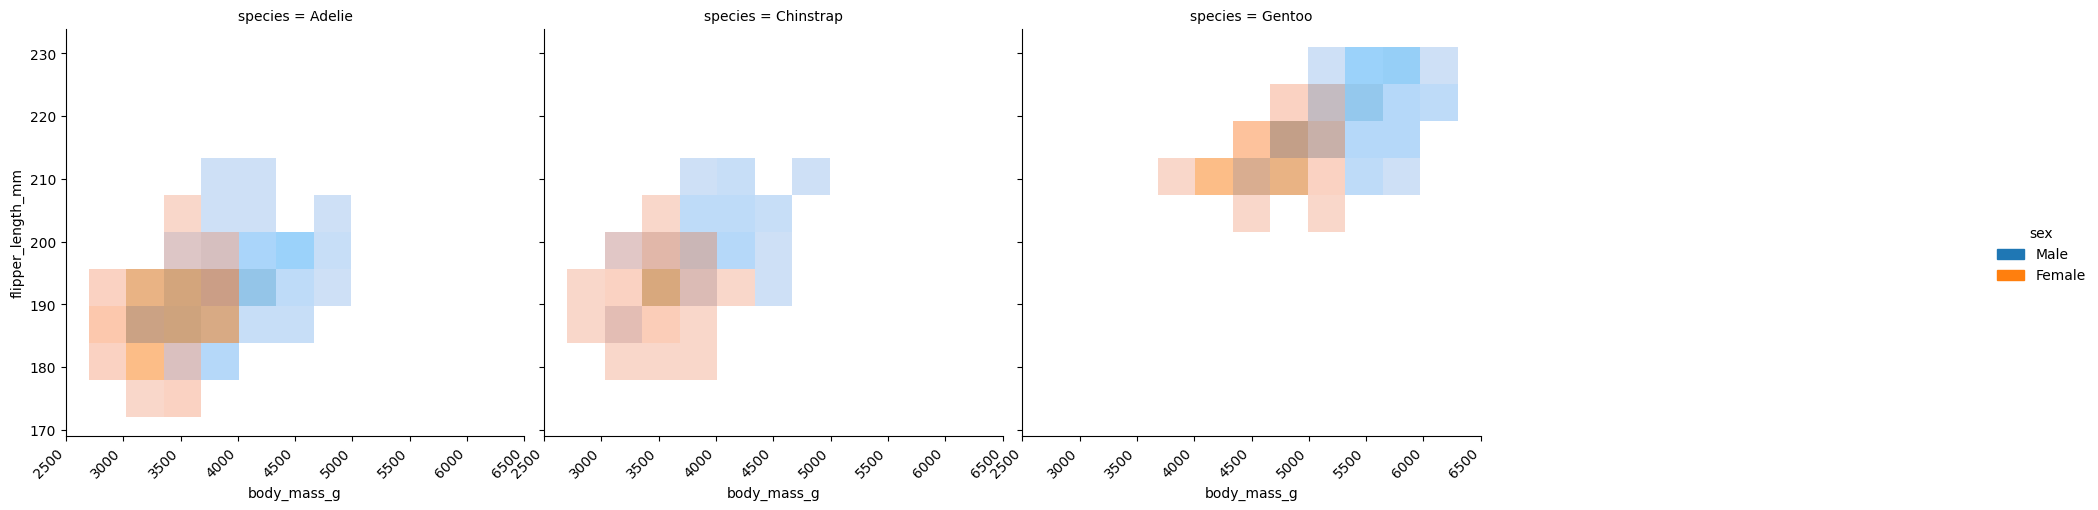

In [43]:
g = sns.displot(
    data=df,
    
    x="body_mass_g",
    y="flipper_length_mm",
    
    aspect=1,
    #kind="kde",
    alpha=0.5,
    
    hue="sex",
    col="species",
    
    col_wrap=4,
    
).set_xticklabels(rotation=45, horizontalalignment="right")

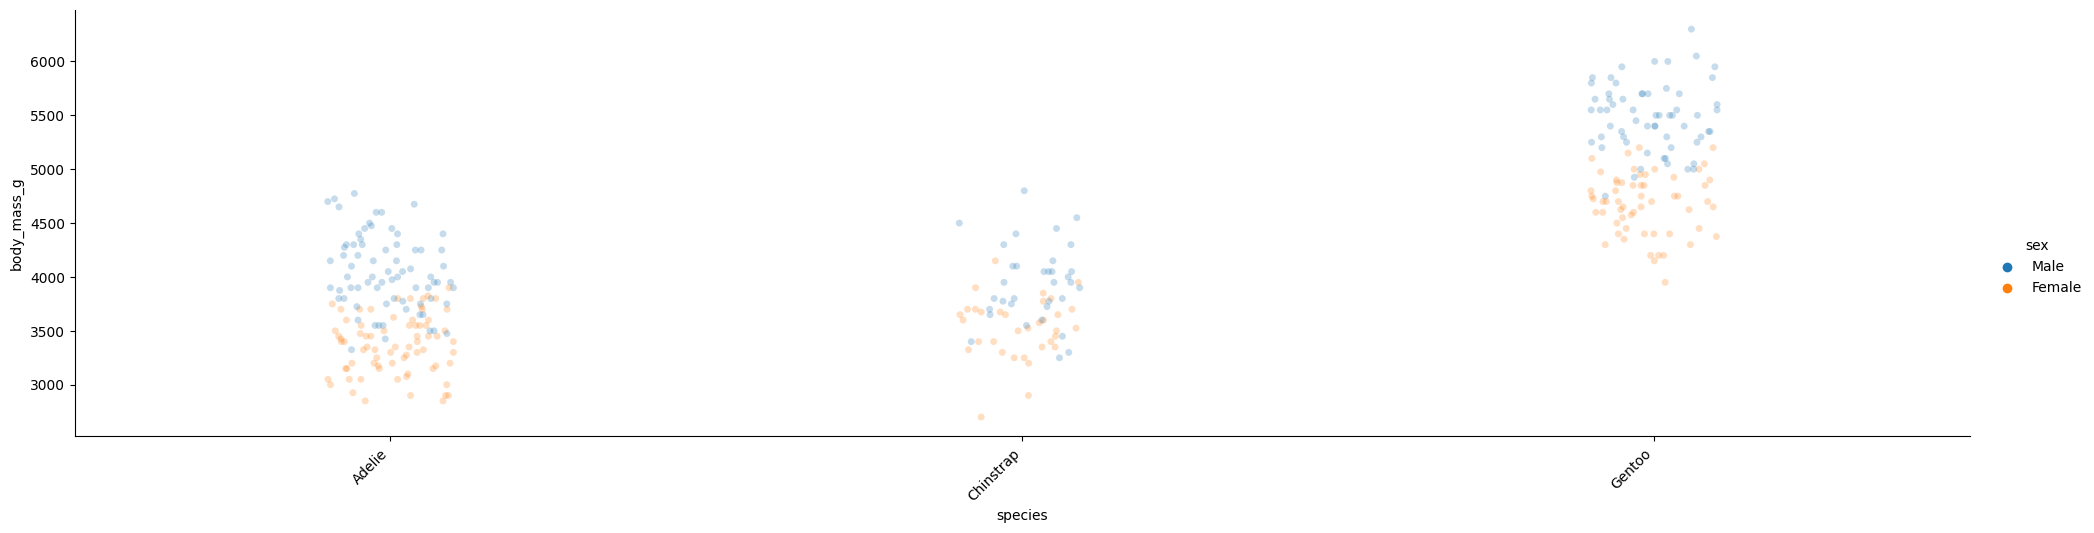

In [45]:
sns.catplot(
    data=df,
    x="species",
    y="body_mass_g",
    
    aspect=4,
    hue="sex",
    alpha=0.25,
    
).set_xticklabels(rotation=45, horizontalalignment="right");

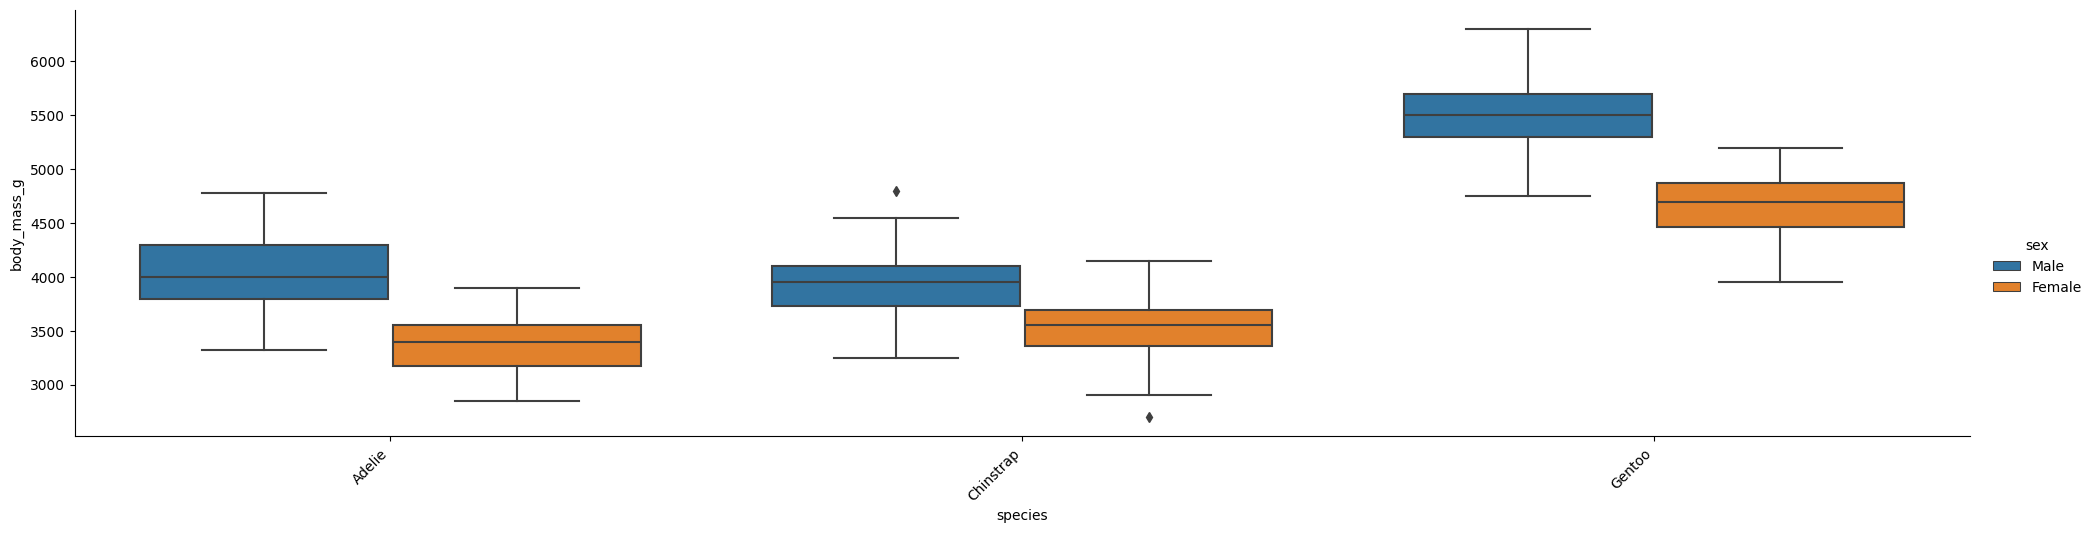

In [49]:
sns.catplot(
    data=df,
    x="species",
    y="body_mass_g",
    
    aspect=4,
    hue="sex",
    kind='box',
    
).set_xticklabels(rotation=45, horizontalalignment="right");

[Text(0.5, 0, 'bill_length_mm'),
 Text(1.5, 0, 'bill_depth_mm'),
 Text(2.5, 0, 'flipper_length_mm'),
 Text(3.5, 0, 'body_mass_g')]

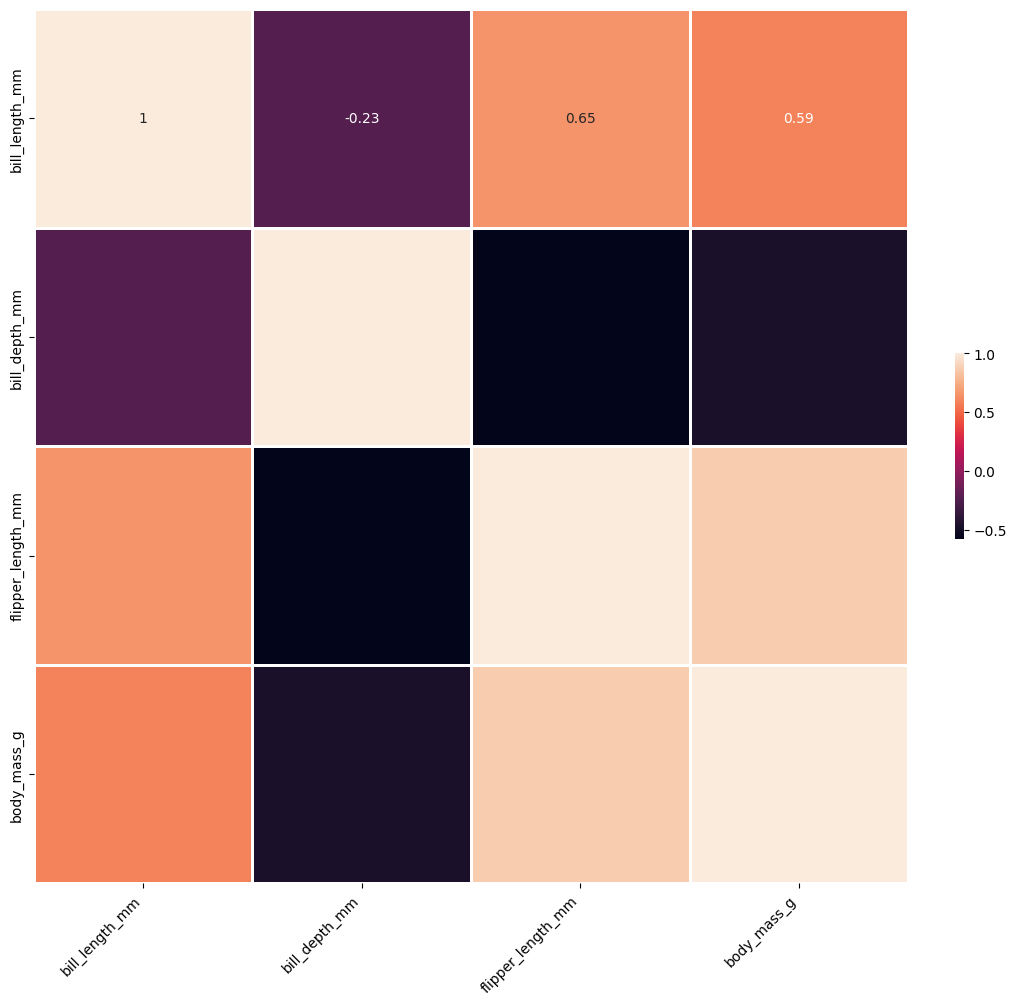

In [55]:

heatmap = sns.heatmap(
    df.corr(numeric_only=True).round(2),
    annot=True,
    square=True,

    cbar_kws={"fraction": 0.01},  # боковой колор-бар (shrink colour bar)
    linewidth=2,  # пространство между клетками
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
)

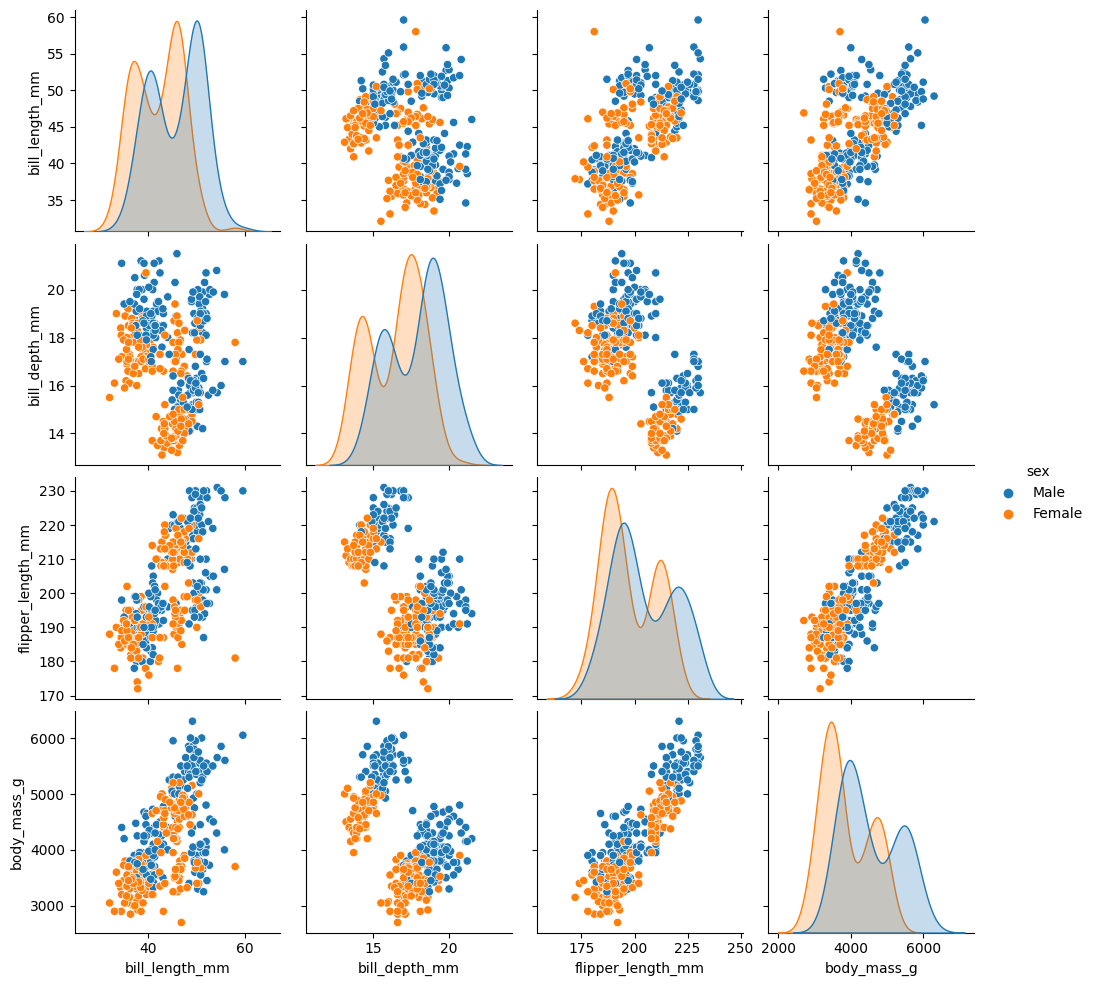

In [56]:
sns.pairplot(
    data=df,
    hue='sex'
)

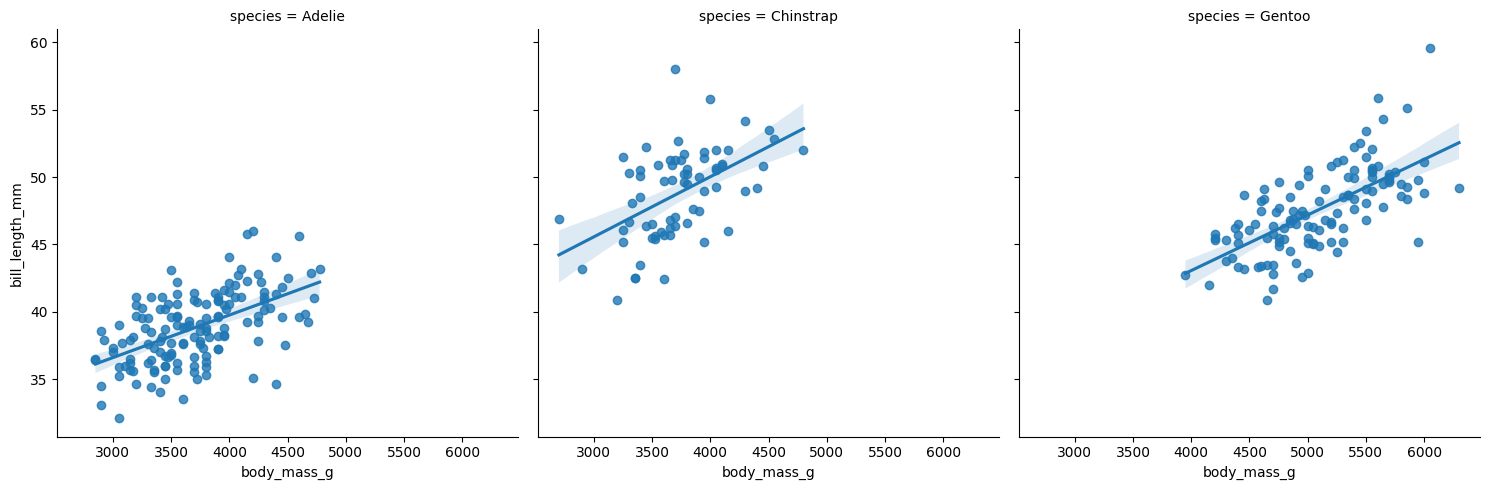

In [57]:
sns.lmplot(
    data=df,
    x="body_mass_g",
    y="bill_length_mm",
    
    col="species",
    
    col_wrap=3,
)

In [50]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Вот как то так
